# Random Forest Classifier - Bagging

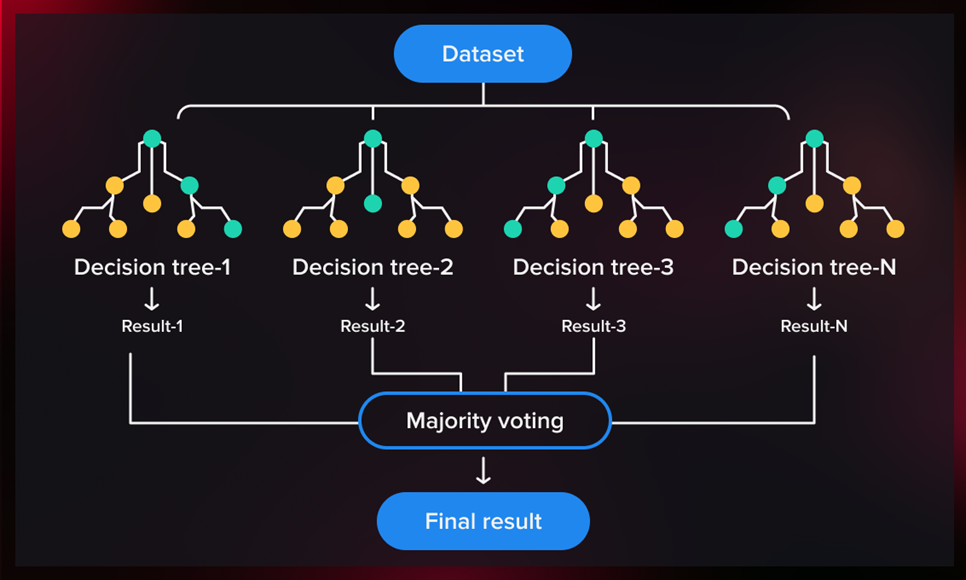

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataset

In [2]:
import pandas as pd
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
df.duplicated().sum()

0

### Seperate X and Y(Drug)

In [6]:
X = df.drop(columns=['Drug'])
Y = df[['Drug']]

In [7]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [8]:
Y.head()

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


In [10]:
Y['Drug'].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

<Axes: xlabel='Drug'>

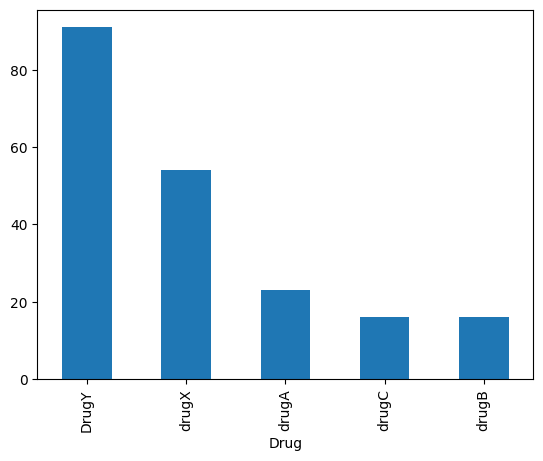

In [11]:
Y['Drug'].value_counts().plot(kind='bar')

### Seperating the categorical and continuous feature

In [12]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [13]:
cat

['Sex', 'BP', 'Cholesterol']

In [14]:
con

['Age', 'Na_to_K']

### Create a preprocessing pipeline for X

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [16]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

In [17]:
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [18]:
pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [19]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,-1.291591,1.286522,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.162699,-0.415145,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.162699,-0.828558,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.988614,-1.149963,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.011034,0.271794,1.0,0.0,0.0,1.0,0.0,1.0,0.0


### Apply Train  test split

In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.3, random_state=21)

In [21]:
xtrain.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
83,-0.382660,-0.660362,1.0,0.0,1.0,0.0,0.0,0.0,1.0
44,0.344485,-0.525888,1.0,0.0,0.0,0.0,1.0,0.0,1.0
115,0.405080,0.306766,0.0,1.0,1.0,0.0,0.0,1.0,0.0
184,-1.594568,2.928655,1.0,0.0,1.0,0.0,0.0,1.0,0.0
159,-0.625042,-0.438737,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [22]:
ytrain.head()

,Drug
83,drugA
44,drugX
115,DrugY
184,DrugY
159,drugX


In [23]:
xtest.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
144,-0.322065,-0.891007,0.0,1.0,1.0,0.0,0.0,1.0,0.0
9,-0.079683,0.455672,0.0,1.0,0.0,1.0,0.0,0.0,1.0
17,-0.079683,-0.293162,0.0,1.0,1.0,0.0,0.0,1.0,0.0
20,0.768653,0.422366,0.0,1.0,0.0,1.0,0.0,0.0,1.0
45,1.314011,-1.107081,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [25]:
ytest.head()

,Drug
144,drugA
9,DrugY
17,drugA
20,DrugY
45,drugX


In [26]:
xtrain.shape

(140, 9)

In [27]:
xtest.shape

(60, 9)

### Create a Random forest model

In [28]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1, max_depth=1, min_samples_split=3, min_samples_leaf=3, criterion='entropy')
model.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', max_depth=1, min_samples_leaf=3,
                       min_samples_split=3, n_estimators=1)

In [29]:
model.score(xtrain, ytrain)

0.5

In [30]:
model.score(xtest, ytest)

0.5666666666666667

### Hyperparameter tuning with RandomisedSearchCV

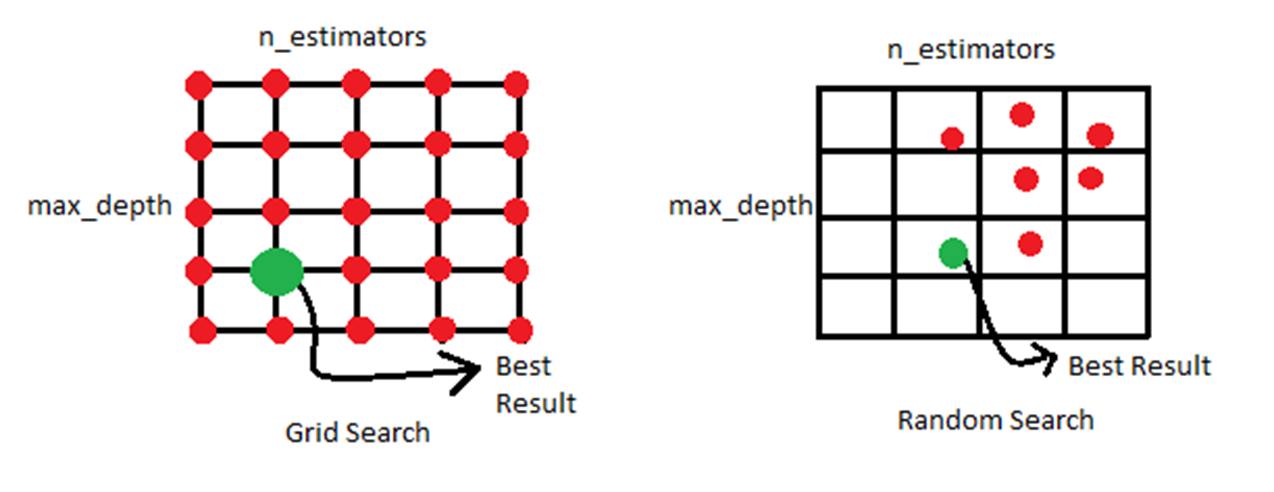

### Randomized search CV will save time for Hyperparameter tuning

In [31]:
params = {'n_estimators':[10, 50, 100, 200, 300],
          'max_depth':[2, 3, 4, 5],
          'min_samples_split':[5, 6, 7, 8, 9],
          'min_samples_leaf':[5, 6, 7, 8, 9],
          'criterion':['gini', 'entropy']}

In [32]:
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier()
rscv = RandomizedSearchCV(rfc, param_distributions=params, cv=5, scoring='f1_macro')
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5],
                                        'min_samples_leaf': [5, 6, 7, 8, 9],
                                        'min_samples_split': [5, 6, 7, 8, 9],
                                        'n_estimators': [10, 50, 100, 200,
                                                         300]},
                   scoring='f1_macro')

In [33]:
rscv.best_params_

{'n_estimators': 300,
 'min_samples_split': 7,
 'min_samples_leaf': 5,
 'max_depth': 3,
 'criterion': 'entropy'}

In [34]:
rscv.best_score_

0.9766857142857143

In [35]:
best_rfc = rscv.best_estimator_
best_rfc

RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       min_samples_split=7, n_estimators=300)

### Calculate model accuracy in train and test

In [36]:
best_rfc.score(xtrain, ytrain)

1.0

In [37]:
best_rfc.score(xtest, ytest)

0.95

### Predict the results for train and test

In [38]:
ypred_tr = best_rfc.predict(xtrain)
ypred_ts = best_rfc.predict(xtest)

In [39]:
ypred_tr[0:5]

array(['drugA', 'drugX', 'DrugY', 'DrugY', 'drugX'], dtype=object)

In [40]:
ytrain.head()

,Drug
83,drugA
44,drugX
115,DrugY
184,DrugY
159,drugX


In [41]:
ypred_ts[0:5]

array(['drugA', 'DrugY', 'drugA', 'DrugY', 'drugX'], dtype=object)

In [42]:
ytest.head()

,Drug
144,drugA
9,DrugY
17,drugA
20,DrugY
45,drugX


### Plot the confusion matrix

In [43]:
model.classes_

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

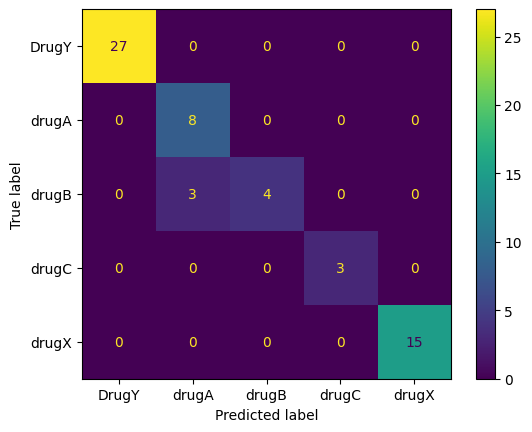

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=model.classes_)
cfd.plot()

### Print the classification report

In [45]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        27
       drugA       0.73      1.00      0.84         8
       drugB       1.00      0.57      0.73         7
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        15

    accuracy                           0.95        60
   macro avg       0.95      0.91      0.91        60
weighted avg       0.96      0.95      0.95        60



### Predction of out of sample data

In [51]:
xnew = pd.read_csv('drug_sample.csv')
xnew

,Age,Sex,BP,Cholesterol,Na_to_K
0,61,F,HIGH,HIGH,25.475
1,23,M,HIGH,HIGH,8.011
2,52,M,LOW,NORMAL,32.922
3,59,M,HIGH,HIGH,13.935
4,42,M,LOW,HIGH,20.013
5,48,M,HIGH,NORMAL,10.446
6,51,F,LOW,NORMAL,23.003
7,61,F,LOW,HIGH,18.043
8,47,M,LOW,HIGH,13.093
9,31,M,HIGH,NORMAL,11.871


### Apply pre.transform

In [52]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Na_to_K']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'BP', 'Cholesterol'])])

In [53]:
xnew_pre = pre.transform(xnew)
xnew_pre

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,1.011034,1.303175,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-1.291591,-1.120403,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.465676,2.336638,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.889843,-0.298296,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,-0.140278,0.545182,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5,0.223294,-0.782485,0.0,1.0,1.0,0.0,0.0,0.0,1.0
6,0.405080,0.960122,1.0,0.0,0.0,1.0,0.0,0.0,1.0
7,1.011034,0.271794,1.0,0.0,0.0,1.0,0.0,1.0,0.0
8,0.162699,-0.415145,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9,-0.806828,-0.584729,0.0,1.0,1.0,0.0,0.0,0.0,1.0


### Predict the results

In [54]:
preds = best_rfc.predict(xnew_pre)
preds

array(['DrugY', 'drugA', 'DrugY', 'drugB', 'DrugY', 'drugA', 'DrugY',
       'DrugY', 'drugC', 'drugA', 'DrugY', 'DrugY', 'DrugY', 'drugB',
       'drugX', 'DrugY', 'drugX', 'drugX', 'DrugY', 'DrugY'], dtype=object)

In [55]:
best_rfc.classes_

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

In [57]:
probs = best_rfc.predict_proba(xnew_pre)
probs[0:5]

array([[8.67388819e-01, 4.01719048e-02, 7.99923848e-02, 2.34865900e-03,
        1.00982321e-02],
       [1.45941751e-01, 5.28768155e-01, 1.79700604e-01, 5.58001144e-02,
        8.97893751e-02],
       [7.99508220e-01, 2.05158730e-03, 1.58333333e-03, 1.46590080e-02,
        1.82197851e-01],
       [1.38759242e-01, 2.91582959e-01, 4.42214403e-01, 4.21202433e-02,
        8.53231523e-02],
       [8.25517673e-01, 4.39229232e-03, 6.66666667e-04, 1.38460836e-01,
        3.09625317e-02]])

In [58]:
probs[0]

array([0.86738882, 0.0401719 , 0.07999238, 0.00234866, 0.01009823])

In [59]:
import numpy as np 
max_probs = np.max(probs, axis=1)
max_probs

array([0.86738882, 0.52876816, 0.79950822, 0.4422144 , 0.82551767,
       0.55996928, 0.82262443, 0.82819434, 0.50997697, 0.57192543,
       0.81081957, 0.87243998, 0.80917225, 0.45409733, 0.65927935,
       0.84565169, 0.70679885, 0.69533689, 0.82030575, 0.81826783])

### Save above results in xnew

In [60]:
xnew['Drug_pred'] = preds 
xnew['prob']=max_probs

In [61]:
xnew

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_pred,prob
0,61,F,HIGH,HIGH,25.475,DrugY,0.867389
1,23,M,HIGH,HIGH,8.011,drugA,0.528768
2,52,M,LOW,NORMAL,32.922,DrugY,0.799508
3,59,M,HIGH,HIGH,13.935,drugB,0.442214
4,42,M,LOW,HIGH,20.013,DrugY,0.825518
5,48,M,HIGH,NORMAL,10.446,drugA,0.559969
6,51,F,LOW,NORMAL,23.003,DrugY,0.822624
7,61,F,LOW,HIGH,18.043,DrugY,0.828194
8,47,M,LOW,HIGH,13.093,drugC,0.509977
9,31,M,HIGH,NORMAL,11.871,drugA,0.571925


### Feature importances

In [64]:
xtrain.columns

Index(['num__Age', 'num__Na_to_K', 'cat__Sex_F', 'cat__Sex_M', 'cat__BP_HIGH',
       'cat__BP_LOW', 'cat__BP_NORMAL', 'cat__Cholesterol_HIGH',
       'cat__Cholesterol_NORMAL'],
      dtype='object')

In [65]:
imp = best_rfc.feature_importances_
imp

array([0.06835143, 0.48834017, 0.00524691, 0.00432423, 0.19629964,
       0.08623771, 0.07496021, 0.03718607, 0.03905363])

In [68]:
imp = pd.Series(imp)
imp.index = xtrain.columns
imp = imp.sort_values(ascending=False)
imp

num__Na_to_K               0.488340
cat__BP_HIGH               0.196300
cat__BP_LOW                0.086238
cat__BP_NORMAL             0.074960
num__Age                   0.068351
cat__Cholesterol_NORMAL    0.039054
cat__Cholesterol_HIGH      0.037186
cat__Sex_F                 0.005247
cat__Sex_M                 0.004324
dtype: float64

<Axes: title={'center': 'Feature Importances'}>

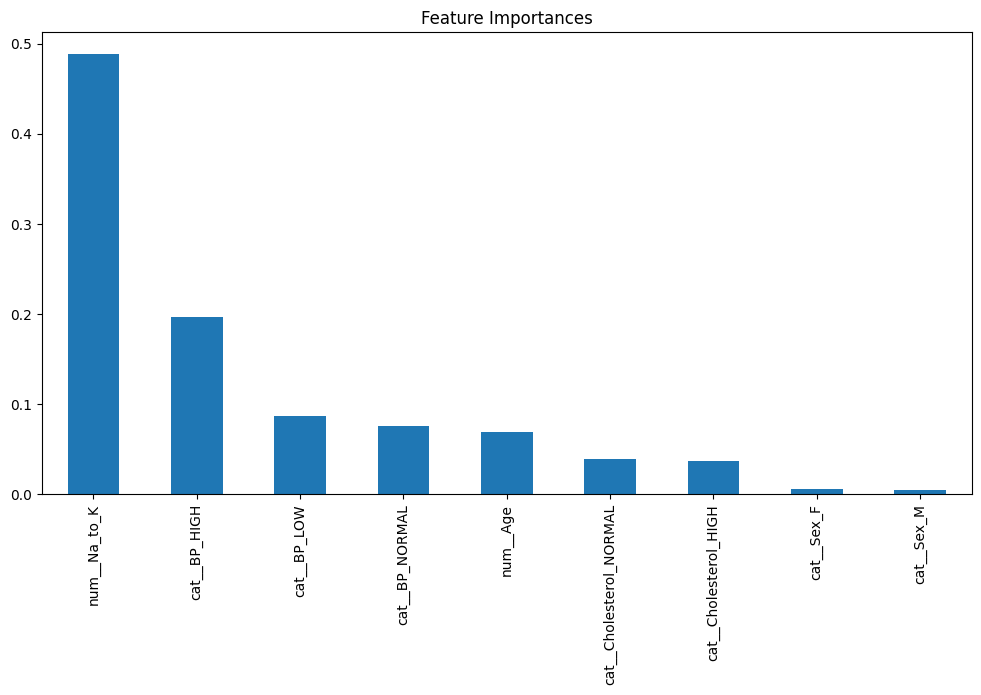

In [69]:
imp.plot(kind='bar', title='Feature Importances', figsize=(12, 6))